In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
    # Load the dataset
health_import = pd.read_csv('HEALTH.csv')

    # Inspection
print(health_import.info())
#print(health_import.head())
#print(health_import.describe())
#print(health_import.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [3]:
    # Display unique values for categorical columns (up to 10 values)
categorical_columns = health_import.select_dtypes(include=['object']).columns
for col in categorical_columns:
   print(f"\nUnique values in {col}: {health_import[col].unique()[:10]}")


Unique values in Timestamp: ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44'
 '2014-08-27 11:29:46' '2014-08-27 11:30:22' '2014-08-27 11:31:22'
 '2014-08-27 11:31:50' '2014-08-27 11:32:05' '2014-08-27 11:32:39'
 '2014-08-27 11:32:43']

Unique values in Gender: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female']

Unique values in Country: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia']

Unique values in state: ['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD']

Unique values in self_employed: [nan 'Yes' 'No']

Unique values in family_history: ['No' 'Yes']

Unique values in treatment: ['Yes' 'No']

Unique values in work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' nan]

Unique values in no_employees: ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']

Unique values in remote_work: ['No' 'Yes']

Unique values in tech_company: ['Yes' 'No']

Un

In [69]:
    # Retain desired columns
health_inspect = health_import.drop(columns=['Timestamp', 'state'])

    # Inspect Age
health_inspect['Age'].value_counts(dropna=False).sort_index(ascending=False)

Age
 99999999999     1
 329             1
 72              1
 65              1
 62              1
 61              1
 60              2
 58              1
 57              3
 56              4
 55              3
 54              3
 53              1
 51              5
 50              6
 49              4
 48              6
 47              2
 46             12
 45             12
 44             11
 43             28
 42             20
 41             21
 40             33
 39             33
 38             39
 37             43
 36             37
 35             55
 34             65
 33             70
 32             82
 31             67
 30             63
 29             85
 28             68
 27             71
 26             75
 25             61
 24             46
 23             51
 22             21
 21             16
 20              6
 19              9
 18              7
 11              1
 8               1
 5               1
-1               1
-29              1
-1726   

8 values immediatetly stand out as faulty, in the outlier area

In [8]:
    # Ensure all ages are positive (change -29 to 29)
health_inspect.loc[:, 'Age'] = health_inspect['Age'].abs()

    # Keep only ages between 18 and 72
health_inspect = health_inspect[(health_inspect['Age'] > 17) & (health_inspect['Age'] < 73)]

    # Confirm
#print(health_inspect['Age'].describe())
#print(health_inspect['Age'].value_counts().sort_index())

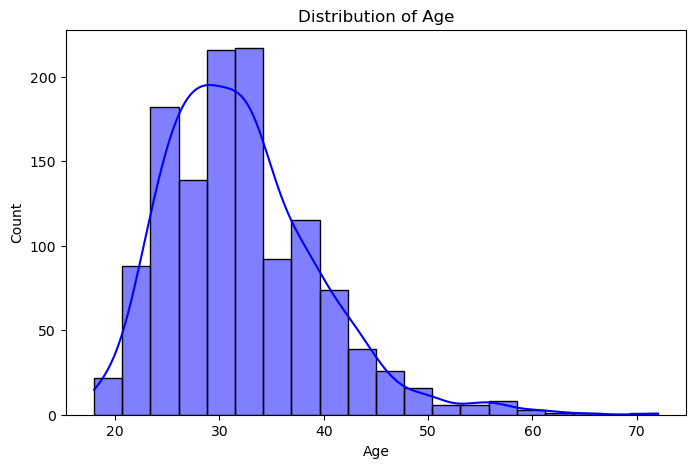

In [9]:
    # EDA - look at age distribution
plt.figure(figsize=(8,5))
sns.histplot(health_inspect['Age'], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [10]:
    # Gender stands out as needing investigtion
health_inspect['Gender'].value_counts(dropna=False).sort_index(ascending=False)

Gender
woman                                               1
something kinda male?                               1
queer/she/they                                      1
queer                                               1
ostensibly male, unsure what that really means      1
non-binary                                          1
msle                                                1
male leaning androgynous                            1
male                                              204
maile                                               1
m                                                  34
fluid                                               1
female                                             62
femail                                              1
f                                                  15
cis-female/femme                                    1
cis male                                            1
Woman                                               3
Trans-female         

In [11]:
    # Create new df before transformations
health_transform = health_inspect.copy()

    # Transform gender into three groups: '0', '1', 'X'
def categorize_gender(value):
    # Normalize strings
   value = str(value).strip().lower()  
    
    # Define known male / female identifiers, categorize undefined or ambiguous gender values
   female_cat = {'female', 'f', 'woman', 'cis female', 'cis-female/femme', 'femake', 
                         'femail', 'female (cis)'}
   male_cat = {'male', 'm', 'man', 'cis male', 'cis man', 'malr', 'mal', 'mail', 
                        'make', 'msle', 'maile', 'male-ish', 'male (cis)', 'something kinda male?',
                        'ostensibly male, unsure what that really means', 'male leaning androgynous',
                        'Guy (-ish) ^_^', }

   if value in female_cat: return '0'
   elif value in male_cat: return '1'
   else:                   return 'X'  

    # Apply the categorization to the Gender column
health_transform.loc[:, 'Gender'] = health_transform['Gender'].apply(categorize_gender)

    # Confirm
health_transform['Gender'].value_counts().sort_index()

Gender
0    247
1    990
X     15
Name: count, dtype: int64

In [12]:
    # With only 15 values, drop Gender 'X'
health_transform = health_transform[health_transform['Gender'] != 'X']

    # Verify the changes
health_transform['Gender'].value_counts()

Gender
1    990
0    247
Name: count, dtype: int64

In [13]:
    # Change other columns to binary
bi_columns = ['remote_work', 'treatment', 'obs_consequence']

    # Convert Yes/No to 1/0
health_transform[bi_columns] = health_transform[bi_columns].replace({'Yes': 1, 'No': 0}).astype('category')

C:\Users\nobul\AppData\Local\Temp\ipykernel_556\3675282696.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health_transform[bi_columns] = health_transform[bi_columns].replace({'Yes': 1, 'No': 0}).astype('category')


In [14]:
    # Alter 'Country': US -> 1, Other -> 0
health_transform['Country'] = health_transform['Country'].apply(lambda x: 1 if x == 'United States' else 0)
health_transform['Country'] = health_transform['Country'].astype('category')

    # Drop 'state'
health_transform.drop(columns=['state'], inplace=True)

    # Confirm
health_transform['Country'].value_counts()

Country
1    739
0    498
Name: count, dtype: int64

In [15]:
    # Change missing values in 'self_employed' to 'No'
health_transform.fillna({'self_employed': 'No'}, inplace=True)

    # Confirm
health_transform['self_employed'].value_counts(dropna=False)

self_employed
No     1097
Yes     140
Name: count, dtype: int64

In [16]:
    # Convert for interpolation
work_interfere_map = {'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4}

    # Convert to numerical values for interpolation
health_transform['work_interfere'] = health_transform['work_interfere'].map(work_interfere_map)

    # Perform linear interpolation
health_transform['work_interfere'] = health_transform['work_interfere'].interpolate(method='linear')

    # Convert back to categorical with the original labels and order
reverse_map = {1: 'Never', 2: 'Rarely', 3: 'Sometimes', 4: 'Often'}
health_transform['work_interfere'] = health_transform['work_interfere'].round().astype(int).map(reverse_map)

    # Convert back to categorical with ordered categories
health_transform['work_interfere'] = pd.Categorical(
    health_transform['work_interfere'], 
    categories=['Never', 'Rarely', 'Sometimes', 'Often'], 
    ordered=True)

    # Confirm
health_transform['work_interfere'].dtype, health_transform['work_interfere'].isna().sum()

(CategoricalDtype(categories=['Never', 'Rarely', 'Sometimes', 'Often'], ordered=True, categories_dtype=object),
 0)

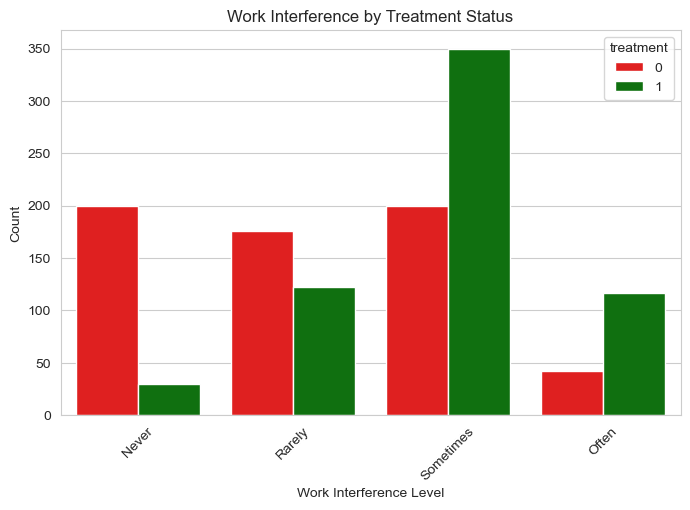

In [65]:
plt.figure(figsize=(8,5))
sns.countplot(x='work_interfere', hue='treatment', data=health_transform, palette={0: 'red', 1: 'green'})
plt.title("Work Interference by Treatment Status")
plt.xlabel("Work Interference Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [18]:
    # Convert 'no_employees' to ordered categorical
health_transform['no_employees'] = pd.Categorical(
    health_transform['no_employees'], 
    categories=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'], 
    ordered=True)

    # Confirm
health_transform['no_employees'].dtype

CategoricalDtype(categories=['1-5', '6-25', '26-100', '100-500', '500-1000',
                  'More than 1000'],
, ordered=True, categories_dtype=object)

In [19]:
    # Convert 'leave' to ordered categorical
    # Standardize the category names 
health_transform['leave'] = health_transform['leave'].replace({
    "Don't know": "Dont_know",
    "Very easy": "Very_easy",
    "Somewhat easy": "Somewhat_easy",
    "Somewhat difficult": "Somewhat_difficult",
    "Very difficult": "Very_difficult"})

    # Apply the categorical transformation
health_transform['leave'] = pd.Categorical(
    health_transform['leave'], 
    categories=["Dont_know", "Very_easy", "Somewhat_easy", "Somewhat_difficult", "Very_difficult"],
    ordered=True)

    # Confirm
health_transform['leave'].dtype

CategoricalDtype(categories=['Dont_know', 'Very_easy', 'Somewhat_easy',
                  'Somewhat_difficult', 'Very_difficult'],
, ordered=True, categories_dtype=object)

In [20]:
    # Change "Don't know" and 'Not sure' into 'Unknown'
health_transform = health_transform.map(
    lambda x: 'Unknown' if isinstance(x, str) and x.strip().lower() in ["don't know", "not sure"] else x)

In [21]:
    # Change 'Some of them' to 'Some'
health_transform = health_transform.map(
    lambda x: 'Some' if isinstance(x, str) and x.strip().lower() in ["some of them"] else x)

In [22]:
    # Convert object columns to categorical
object_columns = health_transform.select_dtypes(include=['object']).columns.tolist()
for col in object_columns:
   health_transform[col] = health_transform[col].astype('category')

    # Confirm
print(health_transform.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1237 entries, 0 to 1258
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1237 non-null   int64   
 1   Gender                     1237 non-null   category
 2   Country                    1237 non-null   category
 3   self_employed              1237 non-null   category
 4   no_employees               1237 non-null   category
 5   remote_work                1237 non-null   category
 6   benefits                   1237 non-null   category
 7   treatment                  1237 non-null   category
 8   work_interfere             1237 non-null   category
 9   care_options               1237 non-null   category
 10  wellness_program           1237 non-null   category
 11  seek_help                  1237 non-null   category
 12  anonymity                  1237 non-null   category
 13  leave                      1237 non-nu

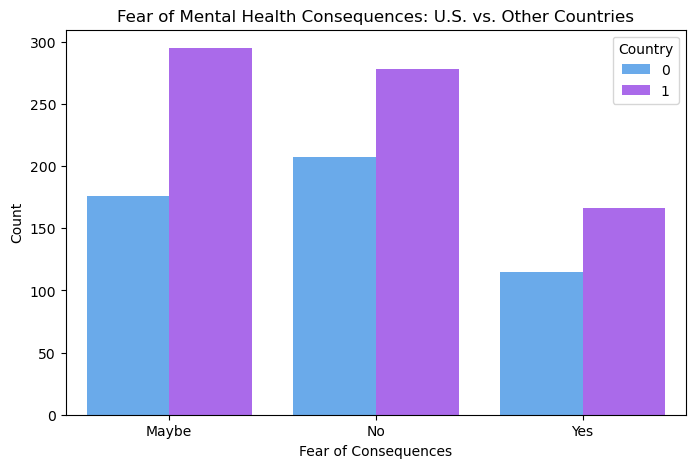

In [23]:
    # Fear of Mental Health Consequences Across Countries
plt.figure(figsize=(8,5))
sns.countplot(x='mental_health_consequence', hue='Country', data=health_transform, palette="cool")
plt.title("Fear of Mental Health Consequences: U.S. vs. Other Countries")
plt.xlabel("Fear of Consequences")
plt.ylabel("Count")
plt.show()

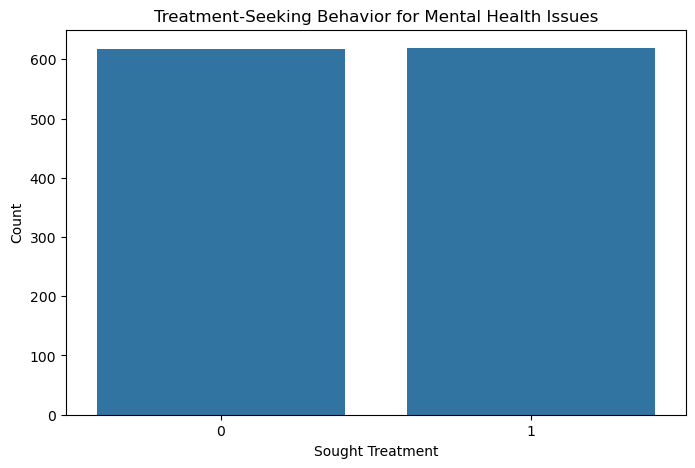

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='treatment', data=health_transform)

plt.title("Treatment-Seeking Behavior for Mental Health Issues")
plt.xlabel("Sought Treatment")
plt.ylabel("Count")
plt.show()


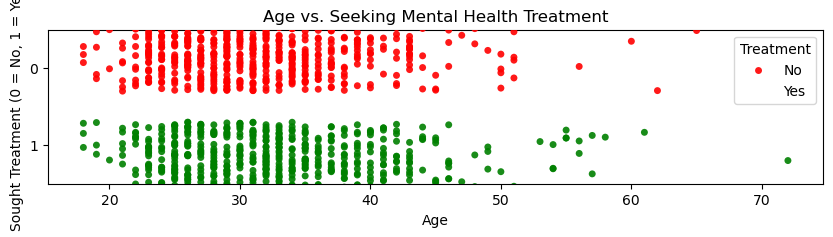

In [25]:
plt.figure(figsize=(10,2))

    # Add slight jitter to the treatment variable to reduce overlap
sns.stripplot(x='Age', y='treatment', data=health_transform, jitter=1, alpha=0.9, 
              hue='treatment', palette={0: 'red', 1: 'green'}, dodge=True)

plt.title("Age vs. Seeking Mental Health Treatment")
plt.xlabel("Age")
plt.ylabel("Sought Treatment (0 = No, 1 = Yes)")
plt.legend(title="Treatment", labels=["No", "Yes"])
plt.show()


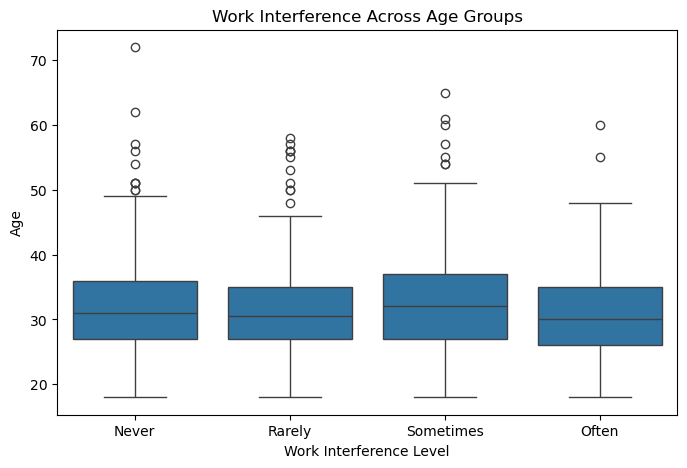

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x='work_interfere', y='Age', data=health_transform)
plt.title("Work Interference Across Age Groups")
plt.xlabel("Work Interference Level")
plt.ylabel("Age")
plt.show()


In [27]:
print(health_transform.info())
#print(health_transform.head())
#print(health_transform.describe())
#print(health_transform.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1237 entries, 0 to 1258
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1237 non-null   int64   
 1   Gender                     1237 non-null   category
 2   Country                    1237 non-null   category
 3   self_employed              1237 non-null   category
 4   no_employees               1237 non-null   category
 5   remote_work                1237 non-null   category
 6   benefits                   1237 non-null   category
 7   treatment                  1237 non-null   category
 8   work_interfere             1237 non-null   category
 9   care_options               1237 non-null   category
 10  wellness_program           1237 non-null   category
 11  seek_help                  1237 non-null   category
 12  anonymity                  1237 non-null   category
 13  leave                      1237 non-nu

    # Display all records where 'work_interfere' is NA
    # If no common underlying feature explains the NA, drop from df
health_transform[health_transform['work_interfere'].isna()].head(30)

    # Without further information, unsure how to classify NA, drop from df
health_transform = health_transform.dropna(subset=['work_interfere'])

    # Confirm
health_transform['work_interfere'].value_counts(dropna=False)

    # Convert 'work_interfere' to ordered categorical
health_transform['work_interfere'] = pd.Categorical(
    health_transform['work_interfere'], 
    categories=['Never', 'Sometimes', 'Rarely', 'Often'], 
    ordered=True)

    # Verify that 'work_interfere' is now categorical
work_interfere_dtype = health_transform['work_interfere'].dtype

    # Confirm
work_interfere_dtype

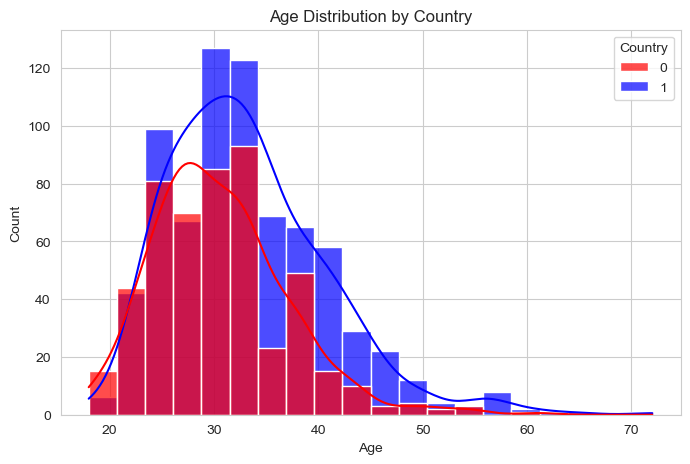

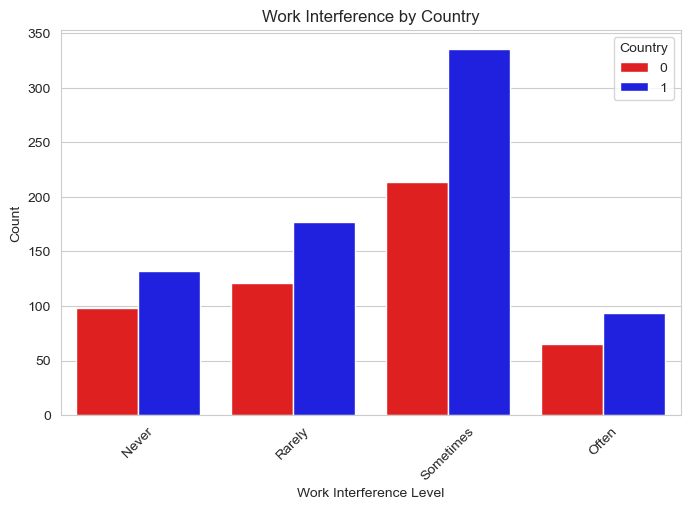

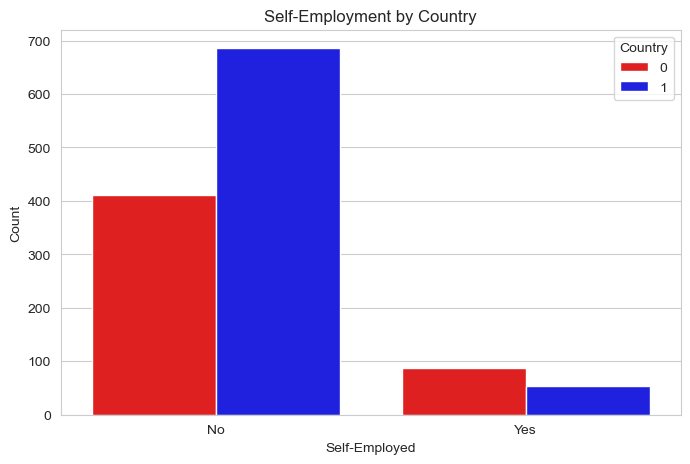

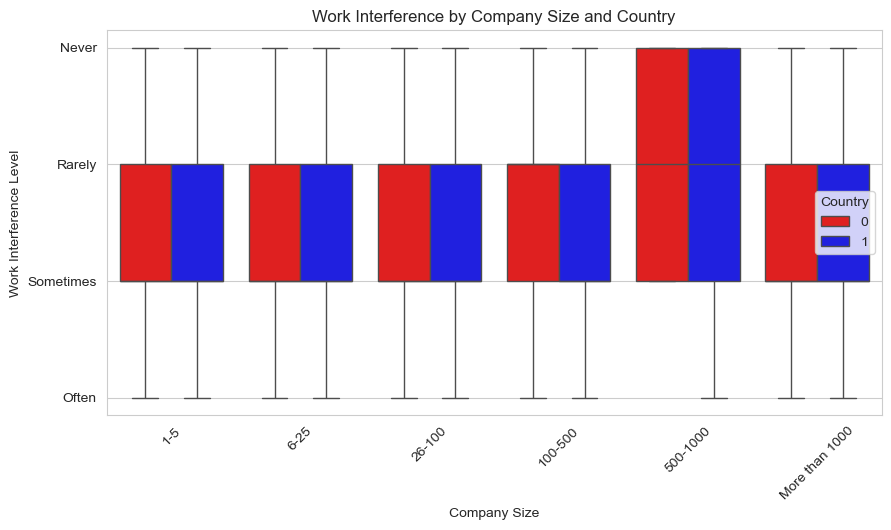

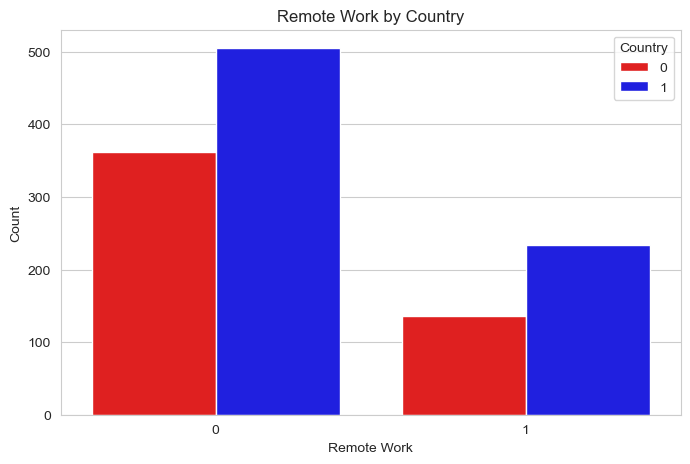

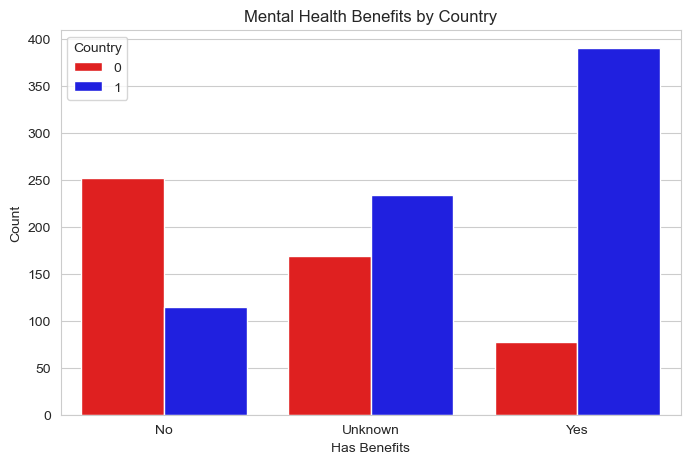

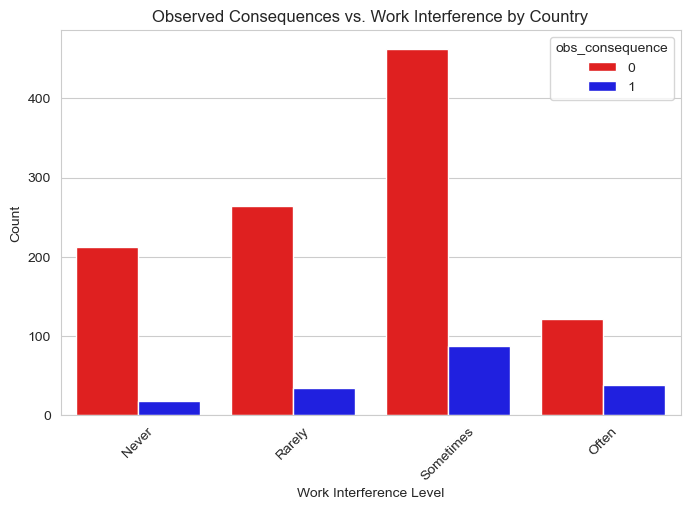

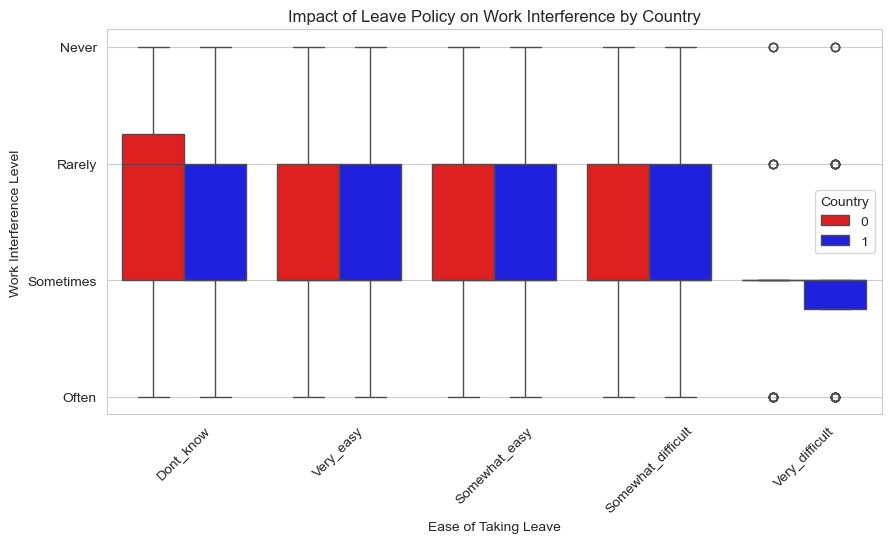

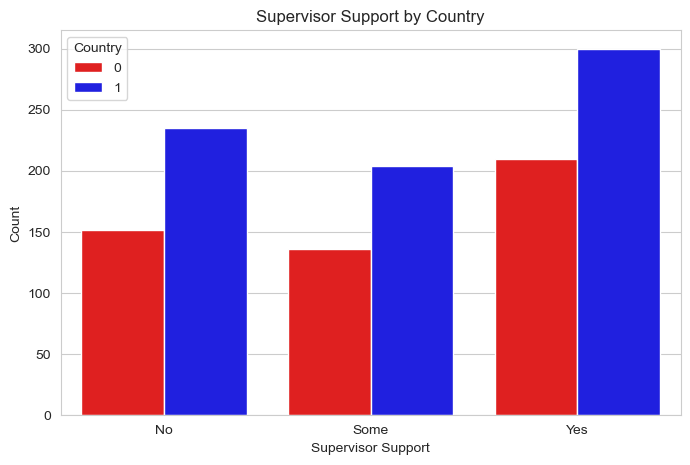

In [59]:

# Set style for better visuals
sns.set_style("whitegrid")

# 1️⃣ Age Distribution (Histogram) with Country as Hue
plt.figure(figsize=(8,5))
sns.histplot(data=health_transform, x='Age', hue='Country', bins=20, kde=True, palette={0: 'red', 1: 'blue'}, alpha=0.7)
plt.title("Age Distribution by Country")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2️⃣ Work Interference by Country (Bar Plot)
plt.figure(figsize=(8,5))
sns.countplot(x='work_interfere', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Work Interference by Country")
plt.xlabel("Work Interference Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Self-Employment vs. Mental Health Treatment by Country
plt.figure(figsize=(8,5))
sns.countplot(x='self_employed', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Self-Employment by Country")
plt.xlabel("Self-Employed")
plt.ylabel("Count")
plt.show()

# 4️⃣ Work Interference Across Company Size by Country (Box Plot)
plt.figure(figsize=(10,5))
sns.boxplot(x='no_employees', y='work_interfere', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Work Interference by Company Size and Country")
plt.xlabel("Company Size")
plt.ylabel("Work Interference Level")
plt.xticks(rotation=45)
plt.show()

# 5️⃣ Remote Work vs. Mental Health Treatment by Country
plt.figure(figsize=(8,5))
sns.countplot(x='remote_work', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Remote Work by Country")
plt.xlabel("Remote Work")
plt.ylabel("Count")
plt.show()

# 6️⃣ Workplace Benefits by Country
plt.figure(figsize=(8,5))
sns.countplot(x='benefits', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Mental Health Benefits by Country")
plt.xlabel("Has Benefits")
plt.ylabel("Count")
plt.show()

# 7️⃣ Observed Consequences vs. Work Interference by Country
plt.figure(figsize=(8,5))
sns.countplot(x='work_interfere', hue='obs_consequence', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Observed Consequences vs. Work Interference by Country")
plt.xlabel("Work Interference Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 8️⃣ Leave Policy & Work Interference by Country
plt.figure(figsize=(10,5))
sns.boxplot(x='leave', y='work_interfere', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Impact of Leave Policy on Work Interference by Country")
plt.xlabel("Ease of Taking Leave")
plt.ylabel("Work Interference Level")
plt.xticks(rotation=45)
plt.show()

# 9️⃣ Supervisor Support by Country
plt.figure(figsize=(8,5))
sns.countplot(x='supervisor', hue='Country', data=health_transform, palette={0: 'red', 1: 'blue'})
plt.title("Supervisor Support by Country")
plt.xlabel("Supervisor Support")
plt.ylabel("Count")
plt.show()
